In [95]:
#import pandas, numpy and matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#load the dataset
df = pd.read_csv('Mastercard Dataset.csv')

In [97]:
# Display first 5 rows
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-05-25,4.030,4.605,4.020,4.600,4.215996,395343000
1,2006-05-26,4.630,4.674,4.411,4.493,4.117929,103044000
2,2006-05-30,4.497,4.498,4.285,4.400,4.032693,49898000
3,2006-05-31,4.435,4.536,4.435,4.494,4.118845,30002000
4,2006-06-01,4.493,4.810,4.490,4.751,4.354391,62344000


In [98]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4549 non-null   object 
 1   Open       4549 non-null   float64
 2   High       4549 non-null   float64
 3   Low        4549 non-null   float64
 4   Close      4549 non-null   float64
 5   Adj Close  4549 non-null   float64
 6   Volume     4549 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 248.9+ KB


In [99]:
# Check for missing data/null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [100]:
# Convert 'Date' to datetime format 
df['Date'] = pd.to_datetime(df['Date'])

In [101]:
# Set 'Date' as an index (for easier time series analysis and graphs)
df.set_index('Date', inplace=True)

In [102]:
# Check for any duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [103]:
# Basic statistical summary
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  4549.000000  4549.000000  4549.000000  4549.000000  4549.000000   
mean    147.409200   148.891428   145.890652   147.439200   143.832265   
std     138.748177   140.068633   137.381384   138.767199   137.939715   
min       4.030000     4.410000     4.020000     4.390000     4.023525   
25%      25.655001    25.955000    25.365999    25.610001    23.761652   
50%      89.480003    90.290001    88.639999    89.250000    84.724167   
75%     277.989990   280.299988   275.420013   278.070007   270.999451   
max     488.529999   490.000000   483.640015   488.640015   487.964142   

             Volume  
count  4.549000e+03  
mean   1.094779e+07  
std    1.657334e+07  
min    6.411000e+05  
25%    3.122500e+06  
50%    4.940600e+06  
75%    1.111900e+07  
max    3.953430e+08  


In [104]:
#Check data range
print(f"Data range: {df.index.min()} to {df.index.max()}")
print(f"Total days: {len(df)}")

Data range: 2006-05-25 00:00:00 to 2024-06-21 00:00:00
Total days: 4549


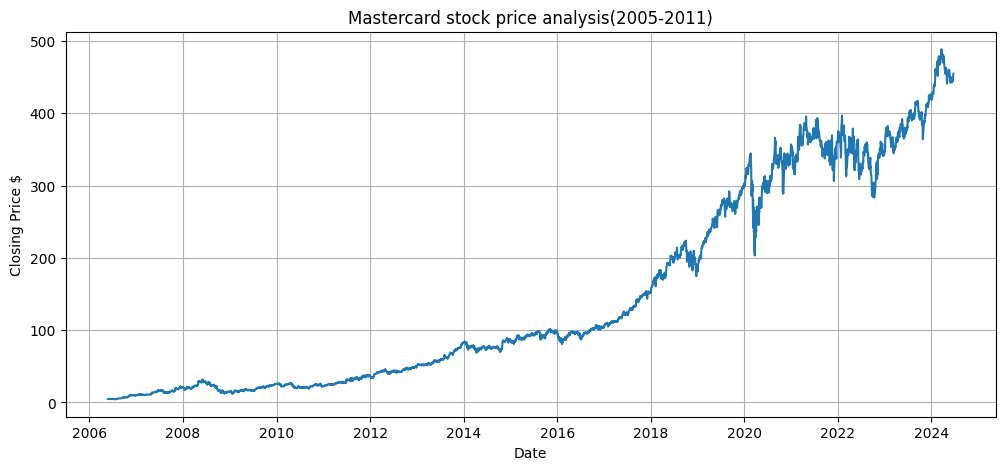

In [105]:
# Time series analysis
# Plotting closing price over time
plt.figure(figsize=(12,5))
plt.plot(df['Close'])
plt.title('Mastercard stock price analysis(2005-2011)')
plt.xlabel('Date')
plt.ylabel('Closing Price $')
plt.grid(True)
plt.show()


In [106]:
# Key Calculations
# Calculating Daily Returns
df['Daily_Return'] = df['Close'].pct_change() * 100

In [107]:
# Print Daily Returns
print(df.Daily_Return)

Date
2006-05-25         NaN
2006-05-26   -2.326087
2006-05-30   -2.069886
2006-05-31    2.136364
2006-06-01    5.718736
                ...   
2024-06-14   -0.083145
2024-06-17    0.782669
2024-06-18    0.446319
2024-06-20    0.533209
2024-06-21    0.517115
Name: Daily_Return, Length: 4549, dtype: float64


In [108]:
# Calculating simple moving averages
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

In [109]:
# Print simple moving averages
print(df.SMA_50)
print(df.SMA_200)

Date
2006-05-25           NaN
2006-05-26           NaN
2006-05-30           NaN
2006-05-31           NaN
2006-06-01           NaN
                 ...    
2024-06-14    454.794001
2024-06-17    454.213201
2024-06-18    453.638401
2024-06-20    453.245401
2024-06-21    452.959001
Name: SMA_50, Length: 4549, dtype: float64
Date
2006-05-25           NaN
2006-05-26           NaN
2006-05-30           NaN
2006-05-31           NaN
2006-06-01           NaN
                 ...    
2024-06-14    434.243001
2024-06-17    434.414001
2024-06-18    434.601351
2024-06-20    434.786051
2024-06-21    435.002801
Name: SMA_200, Length: 4549, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

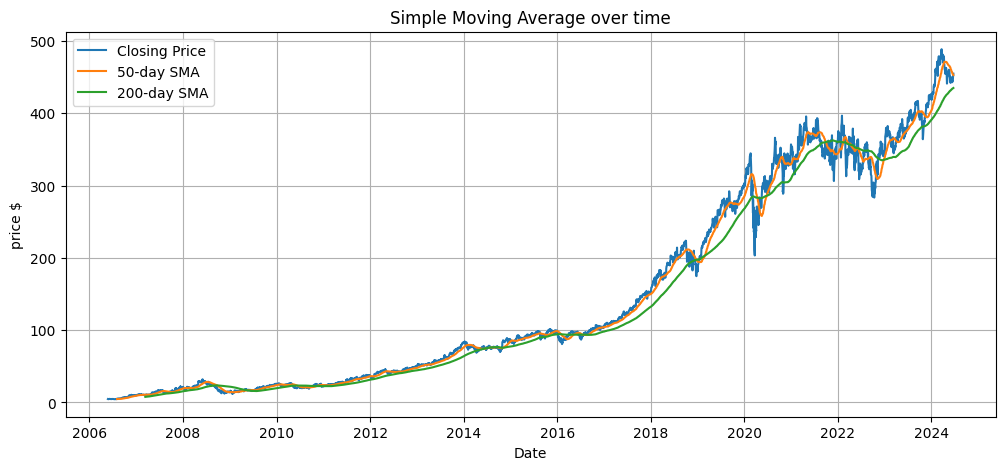

In [110]:
# Plotting Simple moving average over time
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label = 'Closing Price')
plt.plot(df['SMA_50'], label = '50-day SMA')
plt.plot(df['SMA_200'], label = '200-day SMA')
plt.title('Simple Moving Average over time')
plt.xlabel('Date')
plt.ylabel('price $')
plt.legend()
plt.grid(True)
plt.show

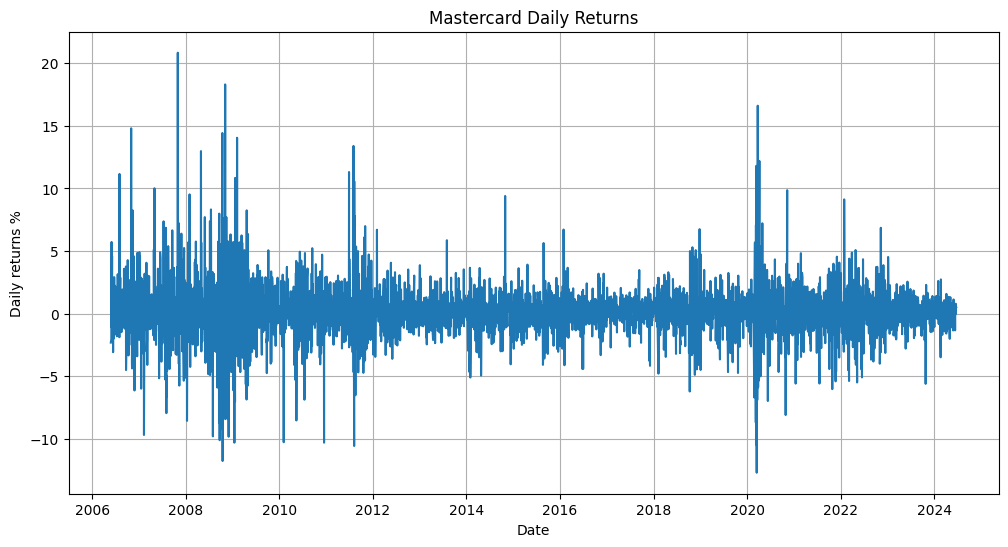

In [111]:
# Volatility Analysis
# Plotting Daily returns over time
plt.figure(figsize=(12,6))
plt.plot(df['Daily_Return'])
plt.title('Mastercard Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily returns %')
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

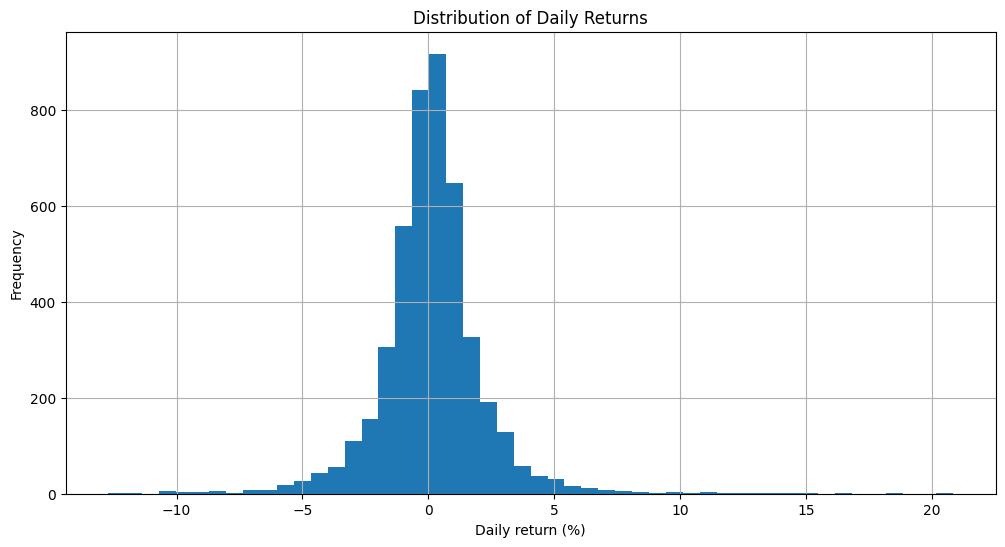

In [112]:
# Plotting histogram of daily returns
plt.figure(figsize=(12,6))
df['Daily_Return'].hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show

In [113]:
# Monthly and Yearly Analysis
# Resample to monthly data and print it
monthly = df['Close'].resample('M').mean()
print(monthly)

Date
2006-05-31      4.496750
2006-06-30      4.675318
2006-07-31      4.576650
2006-08-31      5.326000
2006-09-30      6.369800
                 ...    
2024-02-29    464.961502
2024-03-31    476.379503
2024-04-30    465.490913
2024-05-31    451.814090
2024-06-30    447.827857
Freq: ME, Name: Close, Length: 218, dtype: float64


C:\Users\Poonam Chandra\AppData\Local\Temp\ipykernel_4460\2735872755.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['Close'].resample('M').mean()


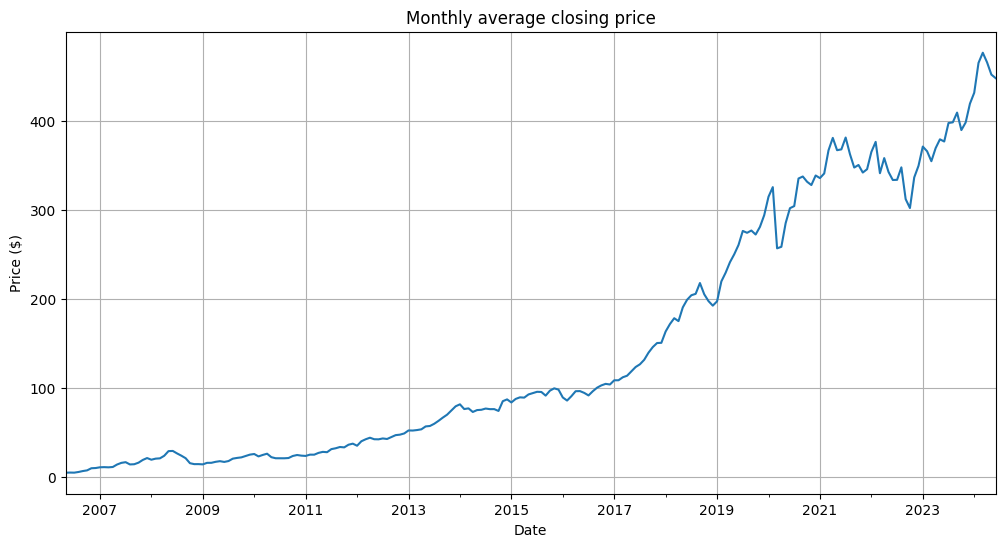

In [114]:
# Plotting monthly average closing price
plt.figure(figsize=(12,6))
monthly.plot()
plt.title('Monthly average closing price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

In [115]:
# Resample to yearly average closing price and print it
yearly = df['Close'].resample('M').mean() 
print(yearly)

Date
2006-05-31      4.496750
2006-06-30      4.675318
2006-07-31      4.576650
2006-08-31      5.326000
2006-09-30      6.369800
                 ...    
2024-02-29    464.961502
2024-03-31    476.379503
2024-04-30    465.490913
2024-05-31    451.814090
2024-06-30    447.827857
Freq: ME, Name: Close, Length: 218, dtype: float64


C:\Users\Poonam Chandra\AppData\Local\Temp\ipykernel_4460\816619164.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yearly = df['Close'].resample('M').mean()


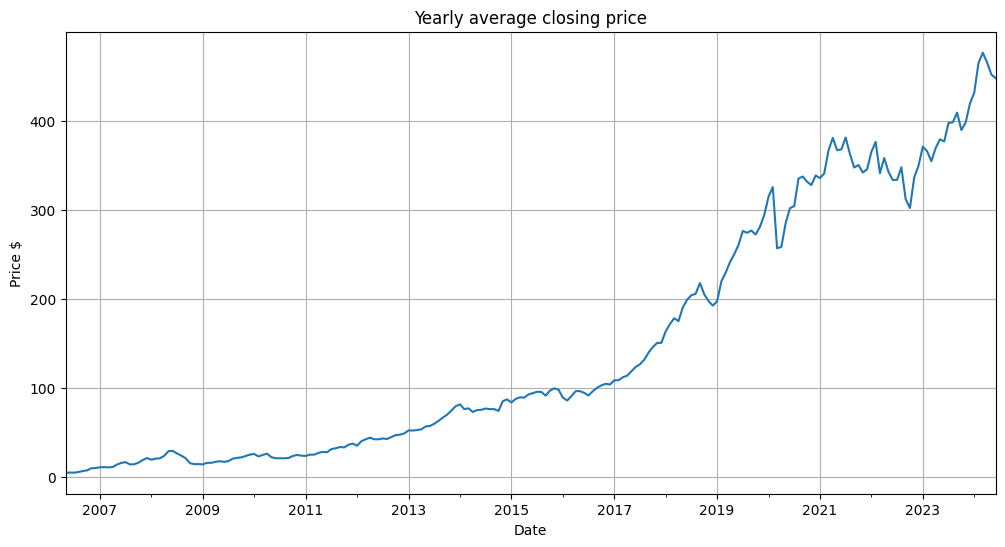

In [116]:
# Plotting yearly average closing price
plt.figure(figsize=(12,6))
yearly.plot()
plt.title('Yearly average closing price')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.grid(True)
plt.show()

In [117]:
# Calculating key metrics
max_close = df['Close'].max()
min_close = df['Close'].min()
final_price = df['Close'].iloc[-1]
initial_price = df['Close'].iloc[0]
total_return = ((final_price-initial_price) / initial_price) * 100

In [118]:
# Printing key metrics
print(f"Highest closing price: {max_close:.2f}")
print(f"Minimum closing price: {min_close:.2f}")
print(f"Final price: {final_price:.2f}")
print(f"Initial price: {initial_price:.2f}")
print(f"Total return: {total_return:.2f}")

Highest closing price: 488.64
Minimum closing price: 4.39
Final price: 454.85
Initial price: 4.60
Total return: 9788.04


In [119]:
# Calculating average daily volume
avg_volume = df['Volume'].mean()
print(f"Average daily volume: {avg_volume:.2f}")

Average daily volume: 10947791.91


In [125]:
# Correlation Analysis
Correlation = df[['Open', 'High', 'Low', 'Close']].corr()
print("\nCorrelation Matrix (%):")
print((Correlation)*100)


Correlation Matrix (%):
             Open        High         Low       Close
Open   100.000000   99.991183   99.988728   99.980667
High    99.991183  100.000000   99.985232   99.989485
Low     99.988728   99.985232  100.000000   99.990879
Close   99.980667   99.989485   99.990879  100.000000


In [126]:
# Creating a simple trading signal (when 50-day crosses above 200-day)
df['Signal'] = np.where(df['SMA_50'] > df['SMA_200'],1,0)

In [128]:
# Printing signal
print(df['Signal'])

Date
2006-05-25    0
2006-05-26    0
2006-05-30    0
2006-05-31    0
2006-06-01    0
             ..
2024-06-14    1
2024-06-17    1
2024-06-18    1
2024-06-20    1
2024-06-21    1
Name: Signal, Length: 4549, dtype: int64


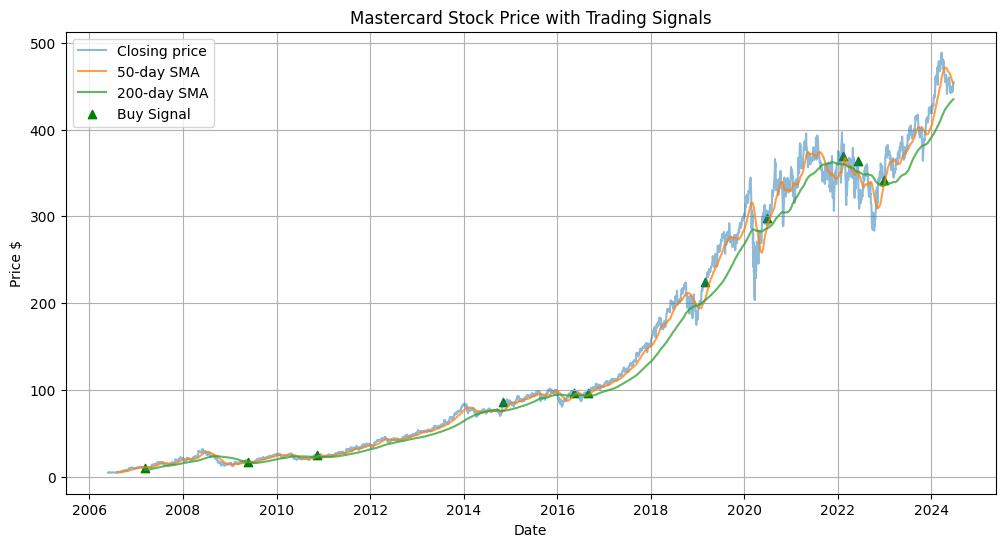

In [132]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing price', alpha=0.5)
plt.plot(df['SMA_50'], label='50-day SMA', alpha=0.75)
plt.plot(df['SMA_200'], label='200-day SMA', alpha=0.75)
plt.scatter(df.index, df['Close'].where(df['Signal'].diff() == 1),
           color='green', label='Buy Signal', marker='^')
plt.title('Mastercard Stock Price with Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid(True)
plt.show()
